In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("viveksharmar/flight-price-data")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/viveksharmar/flight-price-data/versions/1


# Problem Statement: Flight Price Prediction

In the airline industry, flight ticket prices fluctuate dynamically based on various factors such as demand, seasonality, airline carrier, departure time, and route. Predicting flight ticket prices accurately can help passengers make informed booking decisions and assist airline companies in optimizing pricing strategies.

The goal of this project is to build a machine learning model that can predict flight ticket prices based on historical flight data. The model will take into account multiple features such as airline name, source and destination, date of journey, duration, total stops, and departure/arrival times to provide accurate price predictions.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv(r"/flight_dataset.csv")
data.head()

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,16,50,21,35,4,45


**Airlines**: Names of the airlines operating the flights.

**Source and Destination**: Cities where flights originate and land.

**Total Stops**: Number of stops made by the flights.

**Price:** Ticket prices for the respective flights.

**Date, Month, and Year**: Specific dates on which the flights are scheduled.

**Departure and Arrival Times**: Detailed hours and minutes for both departure and arrival.

**Duration**: Total duration of flights in hours and minutes.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Airline         10683 non-null  object
 1   Source          10683 non-null  object
 2   Destination     10683 non-null  object
 3   Total_Stops     10683 non-null  int64 
 4   Price           10683 non-null  int64 
 5   Date            10683 non-null  int64 
 6   Month           10683 non-null  int64 
 7   Year            10683 non-null  int64 
 8   Dep_hours       10683 non-null  int64 
 9   Dep_min         10683 non-null  int64 
 10  Arrival_hours   10683 non-null  int64 
 11  Arrival_min     10683 non-null  int64 
 12  Duration_hours  10683 non-null  int64 
 13  Duration_min    10683 non-null  int64 
dtypes: int64(11), object(3)
memory usage: 1.1+ MB


In [ ]:
data.dtypes # collecting the datatypes#

,0
Airline,object
Source,object
Destination,object
Total_Stops,int64
Price,int64
Date,int64
Month,int64
Year,int64
Dep_hours,int64
Dep_min,int64


In [ ]:
data.isnull().sum()# finding the null values#

,0
Airline,0
Source,0
Destination,0
Total_Stops,0
Price,0
Date,0
Month,0
Year,0
Dep_hours,0
Dep_min,0


In [ ]:
data.describe()

,Total_Stops,Price,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.0,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,0.824207,9087.064121,13.508378,4.708602,2019.0,12.490686,24.411214,13.348778,24.690630,10.246560,28.327249
std,0.675199,4611.359167,8.479277,1.164357,0.0,5.748650,18.767980,6.859125,16.506036,8.494988,16.946113
min,0.000000,1759.000000,1.000000,3.000000,2019.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,5277.000000,6.000000,3.000000,2019.0,8.000000,5.000000,8.000000,10.000000,2.000000,15.000000
50%,1.000000,8372.000000,12.000000,5.000000,2019.0,11.000000,25.000000,14.000000,25.000000,8.000000,30.000000
75%,1.000000,12373.000000,21.000000,6.000000,2019.0,18.000000,40.000000,19.000000,35.000000,15.000000,45.000000
max,4.000000,79512.000000,27.000000,6.000000,2019.0,23.000000,55.000000,23.000000,55.000000,47.000000,55.000000


In [ ]:
data.columns# checking the column names#

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Price', 'Date',
       'Month', 'Year', 'Dep_hours', 'Dep_min', 'Arrival_hours', 'Arrival_min',
       'Duration_hours', 'Duration_min'],
      dtype='object')

# Simple EDA

In [ ]:
data["Airline"].value_counts()

,count
Airline,
Jet Airways,3849
IndiGo,2053
Air India,1752
Multiple carriers,1196
SpiceJet,818
Vistara,479
Air Asia,319
GoAir,194
Multiple carriers Premium economy,13


<ipython-input-57-f8a8d3b85f91>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Airline",data=data,palette="viridis")


<Axes: xlabel='Airline', ylabel='count'>

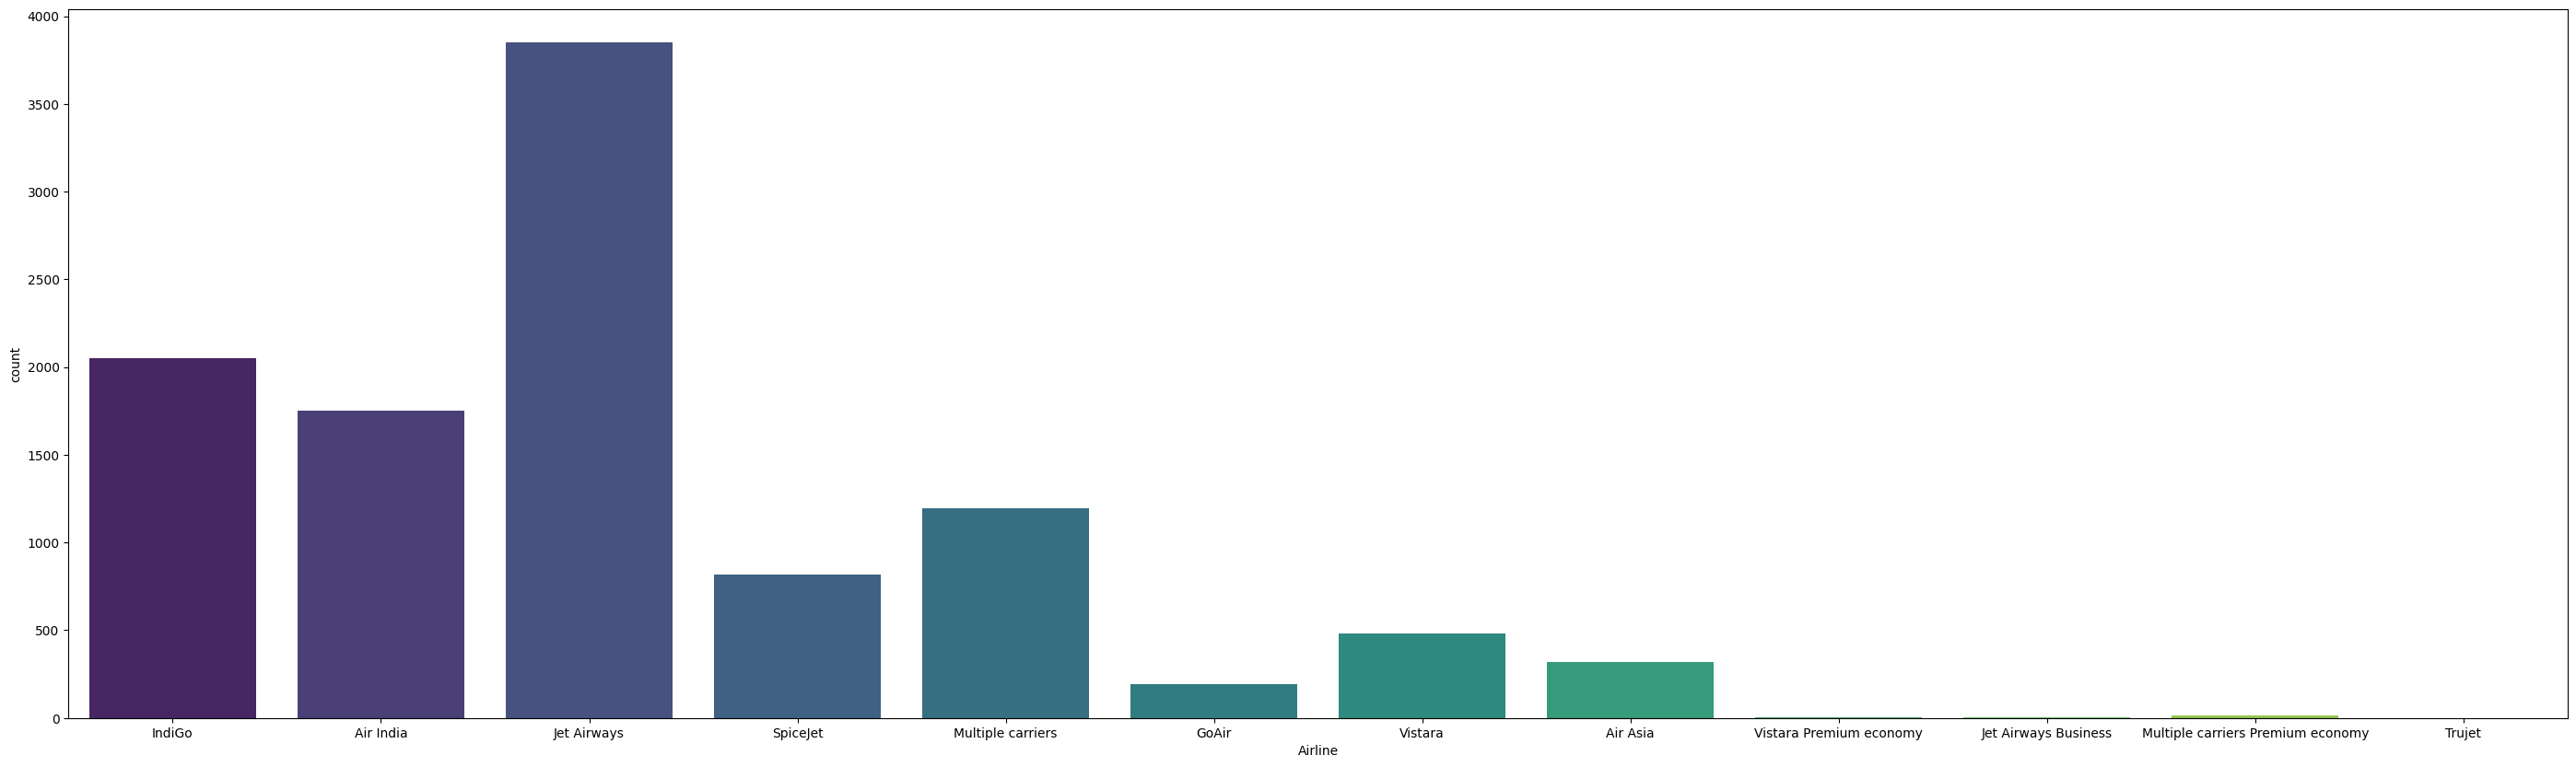

In [ ]:
plt.figure(figsize=(35,10))
sns.countplot(x="Airline",data=data,palette="viridis")

From the above figure jet airways shows the highest count

<ipython-input-58-7d45f7b07bd6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Source",data=data,palette="plasma")


<Axes: xlabel='Source', ylabel='count'>

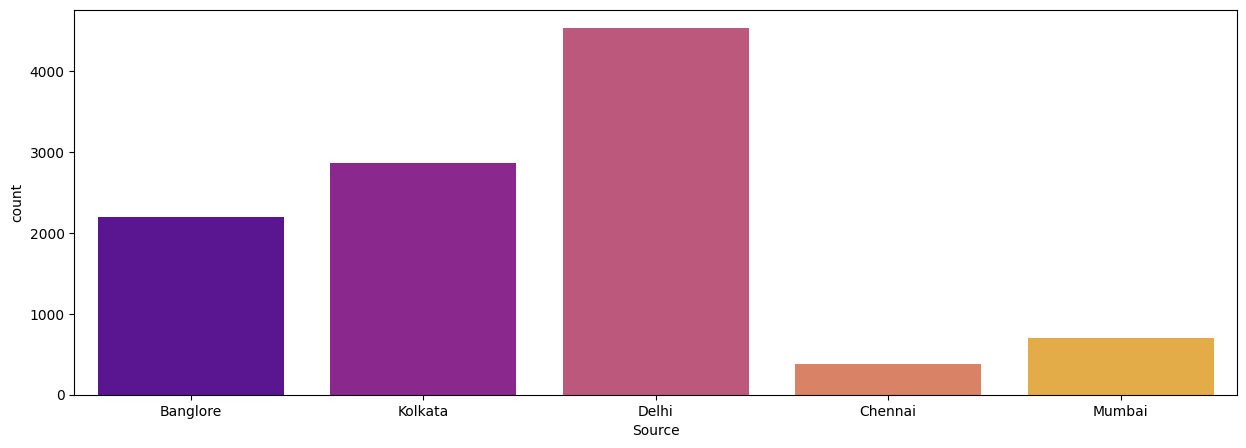

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x="Source",data=data,palette="plasma")

<ipython-input-59-de65a52720f8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Destination",data=data,palette="viridis")


<Axes: xlabel='Destination', ylabel='count'>

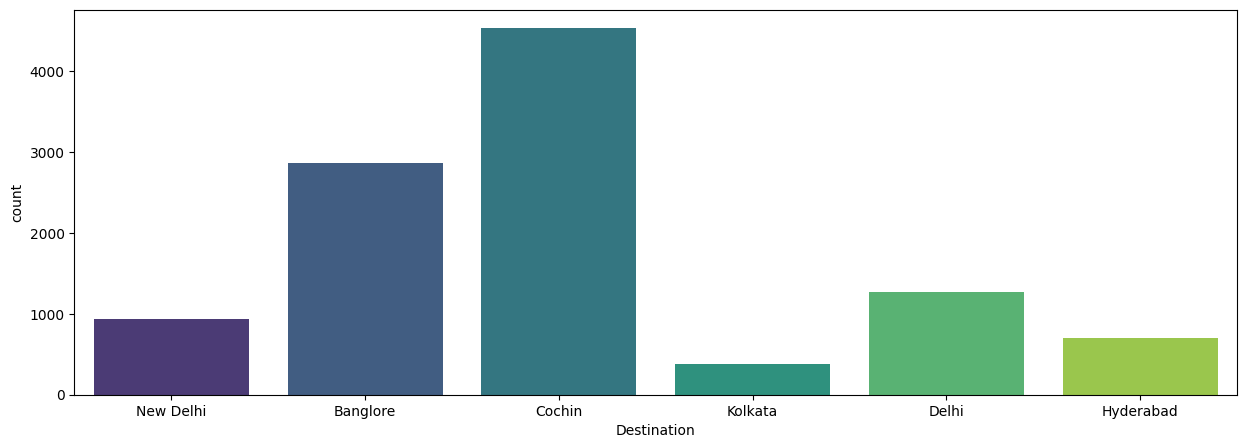

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x="Destination",data=data,palette="viridis")

<ipython-input-60-db08033be887>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Total_Stops",y="Price",data=data,palette="Set2")


<Axes: xlabel='Total_Stops', ylabel='Price'>

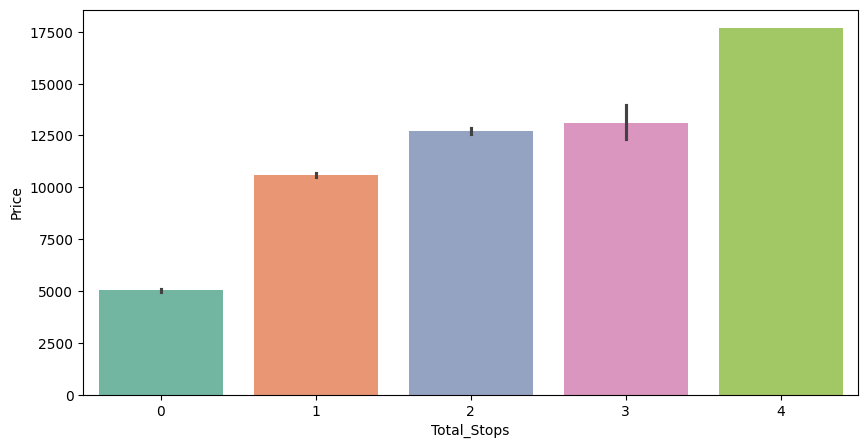

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x="Total_Stops",y="Price",data=data,palette="Set2")

<ipython-input-61-9e7c3a5ef8d6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Total_Stops",y="Price",data=data,palette="plasma")


<Axes: xlabel='Total_Stops', ylabel='Price'>

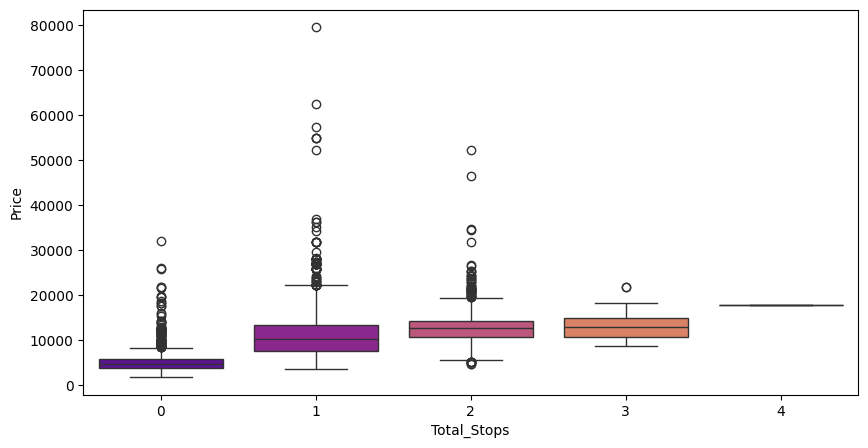

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Total_Stops",y="Price",data=data,palette="plasma")

In [ ]:
data.dtypes

,0
Airline,object
Source,object
Destination,object
Total_Stops,int64
Price,int64
Date,int64
Month,int64
Year,int64
Dep_hours,int64
Dep_min,int64


In [ ]:
numerical_columns=data[["Total_Stops","Price","Date","Month","Duration_hours"]]
numerical_columns.head()

,Total_Stops,Price,Date,Month,Duration_hours
0,0,3897,24,3,2
1,2,7662,1,5,7
2,2,13882,9,6,19
3,1,6218,12,5,5
4,1,13302,1,3,4


<Axes: >

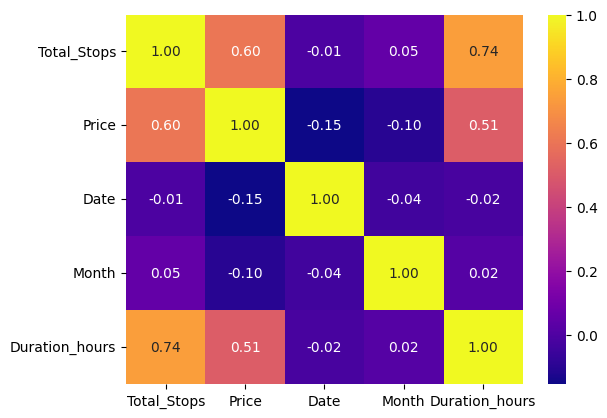

In [ ]:
sns.heatmap(numerical_columns.corr(),annot=True,cmap="plasma", fmt=".2f")

There is a Positive Correlation Between "Total_steps","Price","Duration Hours"

<Axes: xlabel='Price', ylabel='Count'>

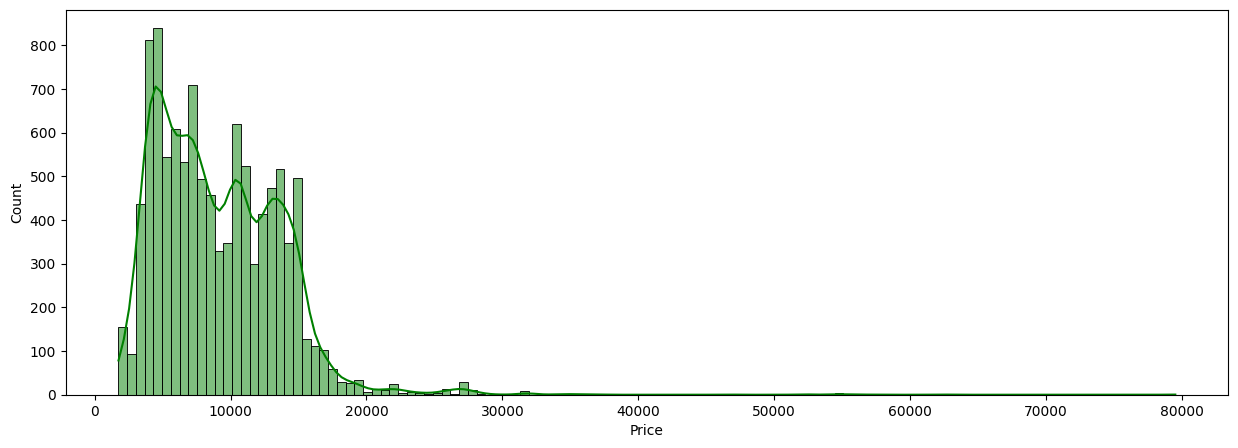

In [ ]:
plt.figure(figsize=(15,5))
sns.histplot(data["Price"],color="green",kde=True)

In [ ]:
data.drop(columns=["Date"],inplace=True)
data.head()

,Airline,Source,Destination,Total_Stops,Price,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min
0,IndiGo,Banglore,New Delhi,0,3897,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,3,2019,16,50,21,35,4,45


In [ ]:
data.drop(columns=["Year"],inplace=True)
data.head()

,Airline,Source,Destination,Total_Stops,Price,Month,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min
0,IndiGo,Banglore,New Delhi,0,3897,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,3,16,50,21,35,4,45


In [ ]:
data["Departure_Hours"]=data['Dep_hours'].astype(str) + ':' + data['Dep_min'].astype(str).str.zfill(2)
data["Arrival_Hours"]=data['Arrival_hours'].astype(str) + ':' + data['Arrival_min'].astype(str).str.zfill(2)
data["Duration_Hours"]=data['Duration_hours'].astype(str) + ':' + data['Duration_min'].astype(str).str.zfill(2)
data.head()

,Airline,Source,Destination,Total_Stops,Price,Month,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min,Departure_Hours,Arrival_Hours,Duration_Hours
0,IndiGo,Banglore,New Delhi,0,3897,3,22,20,1,10,2,50,22:20,1:10,2:50
1,Air India,Kolkata,Banglore,2,7662,5,5,50,13,15,7,25,5:50,13:15,7:25
2,Jet Airways,Delhi,Cochin,2,13882,6,9,25,4,25,19,0,9:25,4:25,19:00
3,IndiGo,Kolkata,Banglore,1,6218,5,18,5,23,30,5,25,18:05,23:30,5:25
4,IndiGo,Banglore,New Delhi,1,13302,3,16,50,21,35,4,45,16:50,21:35,4:45


In [ ]:
data.drop(columns=["Dep_hours","Dep_min","Arrival_hours","Arrival_min","Duration_hours","Duration_min"],inplace=True)
data.head()

,Airline,Source,Destination,Total_Stops,Price,Month,Departure_Hours,Arrival_Hours,Duration_Hours
0,IndiGo,Banglore,New Delhi,0,3897,3,22:20,1:10,2:50
1,Air India,Kolkata,Banglore,2,7662,5,5:50,13:15,7:25
2,Jet Airways,Delhi,Cochin,2,13882,6,9:25,4:25,19:00
3,IndiGo,Kolkata,Banglore,1,6218,5,18:05,23:30,5:25
4,IndiGo,Banglore,New Delhi,1,13302,3,16:50,21:35,4:45


In [ ]:
data["Airline"].value_counts()

,count
Airline,
Jet Airways,3849
IndiGo,2053
Air India,1752
Multiple carriers,1196
SpiceJet,818
Vistara,479
Air Asia,319
GoAir,194
Multiple carriers Premium economy,13


In [ ]:
datac=data.copy()

In [ ]:
datac["Airline"].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [ ]:
dummies = pd.get_dummies(datac["Airline"])
dummies.head()  # Should show 0s and 1s


,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,False,False,False,True,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False


In [ ]:
dummies = pd.get_dummies(datac["Airline"]).astype(int)
dummies.head()

,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
merged=pd.concat([datac,dummies],axis="columns")
merged.head()

,Airline,Source,Destination,Total_Stops,Price,Month,Departure_Hours,Arrival_Hours,Duration_Hours,Air Asia,...,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,IndiGo,Banglore,New Delhi,0,3897,3,22:20,1:10,2:50,0,...,0,1,0,0,0,0,0,0,0,0
1,Air India,Kolkata,Banglore,2,7662,5,5:50,13:15,7:25,0,...,0,0,0,0,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,6,9:25,4:25,19:00,0,...,0,0,1,0,0,0,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,5,18:05,23:30,5:25,0,...,0,1,0,0,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,3,16:50,21:35,4:45,0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
final=merged.drop(["Airline","Trujet","Vistara Premium economy","Jet Airways Business","Multiple carriers Premium economy"],axis="columns")
final.head()

,Source,Destination,Total_Stops,Price,Month,Departure_Hours,Arrival_Hours,Duration_Hours,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Multiple carriers,SpiceJet,Vistara
0,Banglore,New Delhi,0,3897,3,22:20,1:10,2:50,0,0,0,1,0,0,0,0
1,Kolkata,Banglore,2,7662,5,5:50,13:15,7:25,0,1,0,0,0,0,0,0
2,Delhi,Cochin,2,13882,6,9:25,4:25,19:00,0,0,0,0,1,0,0,0
3,Kolkata,Banglore,1,6218,5,18:05,23:30,5:25,0,0,0,1,0,0,0,0
4,Banglore,New Delhi,1,13302,3,16:50,21:35,4:45,0,0,0,1,0,0,0,0


In [ ]:
datac["Source"].value_counts()

,count
Source,
Delhi,4537
Kolkata,2871
Banglore,2197
Mumbai,697
Chennai,381


In [ ]:
data

,Airline,Source,Destination,Total_Stops,Price,Month,Departure_Hours,Arrival_Hours,Duration_Hours
0,IndiGo,Banglore,New Delhi,0,3897,3,22:20,1:10,2:50
1,Air India,Kolkata,Banglore,2,7662,5,5:50,13:15,7:25
2,Jet Airways,Delhi,Cochin,2,13882,6,9:25,4:25,19:00
3,IndiGo,Kolkata,Banglore,1,6218,5,18:05,23:30,5:25
4,IndiGo,Banglore,New Delhi,1,13302,3,16:50,21:35,4:45
...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,4,19:55,22:25,2:30
10679,Air India,Kolkata,Banglore,0,4145,4,20:45,23:20,2:35
10680,Jet Airways,Banglore,Delhi,0,7229,4,8:20,11:20,3:00
10681,Vistara,Banglore,New Delhi,0,12648,3,11:30,14:10,2:40


In [ ]:
data["Departure_Hours"] = pd.to_datetime(data["Departure_Hours"], errors='coerce').dt.strftime("%H%M").astype(float)
data["Arrival_Hours"] = pd.to_datetime(data["Arrival_Hours"], errors='coerce').dt.strftime("%H%M").astype(float)
data["Duration_Hours"] = pd.to_datetime(data["Duration_Hours"], errors='coerce').dt.strftime("%H%M").astype(float)

<ipython-input-79-40842f310828>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["Departure_Hours"] = pd.to_datetime(data["Departure_Hours"], errors='coerce').dt.strftime("%H%M").astype(float)
<ipython-input-79-40842f310828>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["Arrival_Hours"] = pd.to_datetime(data["Arrival_Hours"], errors='coerce').dt.strftime("%H%M").astype(float)
<ipython-input-79-40842f310828>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["Duration_Hours"] = pd.to_datetime(data["Duration_Hours"], errors='coerce').dt.strftime("%H%M").astype

In [ ]:
data

,Airline,Source,Destination,Total_Stops,Price,Month,Departure_Hours,Arrival_Hours,Duration_Hours
0,IndiGo,Banglore,New Delhi,0,3897,3,2220.0,110.0,250.0
1,Air India,Kolkata,Banglore,2,7662,5,550.0,1315.0,725.0
2,Jet Airways,Delhi,Cochin,2,13882,6,925.0,425.0,1900.0
3,IndiGo,Kolkata,Banglore,1,6218,5,1805.0,2330.0,525.0
4,IndiGo,Banglore,New Delhi,1,13302,3,1650.0,2135.0,445.0
...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,4,1955.0,2225.0,230.0
10679,Air India,Kolkata,Banglore,0,4145,4,2045.0,2320.0,235.0
10680,Jet Airways,Banglore,Delhi,0,7229,4,820.0,1120.0,300.0
10681,Vistara,Banglore,New Delhi,0,12648,3,1130.0,1410.0,240.0


In [ ]:
data["Airline"].value_counts()


,count
Airline,
Jet Airways,3849
IndiGo,2053
Air India,1752
Multiple carriers,1196
SpiceJet,818
Vistara,479
Air Asia,319
GoAir,194
Multiple carriers Premium economy,13


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

In [ ]:

categorical_cols = [col for col in data.columns if 'Airline_' in col or 'Source_' in col or 'Destination_' in col]

numerical_cols = ["Total_Stops", "Month", "Departure_Hours", "Arrival_Hours", "Duration_Hours"]


In [ ]:
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols)  # Scale numerical columns only
], remainder='passthrough')

In [ ]:
processed_data = preprocessor.fit_transform(data)


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x=data.drop(columns=["Price"])
y=data["Price"]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((8546, 8), (2137, 8), (8546,), (2137,))

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
!pip install optuna

In [ ]:
import optuna
from sklearn.model_selection import cross_val_score

def objective(trial):
    model_name = trial.suggest_categorical("model", ["DecisionTree", "RandomForest"])

    if model_name == "DecisionTree":
        max_depth = trial.suggest_int("max_depth", 3, 20)
        model = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

    else:
        n_estimators = trial.suggest_int("n_estimators", 50, 300, step=50)
        max_depth = trial.suggest_int("max_depth", 3, 20)
        model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=42)

    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])


    score = cross_val_score(pipeline, x_train, y_train, cv=5, scoring="r2").mean()
    return score






In [ ]:

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

[I 2025-03-17 17:07:38,268] A new study created in memory with name: no-name-952bfc3e-e77b-44a7-abd4-628647008dff
[W 2025-03-17 17:07:38,386] Trial 0 failed with parameters: {'model': 'RandomForest', 'n_estimators': 300, 'max_depth': 4} because of the following error: ValueError('\nAll the 5 fits failed.\nIt is very likely that your model is misconfigured.\nYou can try to debug the error by setting error_score=\'raise\'.\n\nBelow are more details about the failures:\n--------------------------------------------------------------------------------\n1 fits failed with the following error:\nTraceback (most recent call last):\n  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score\n    estimator.fit(X_train, y_train, **fit_params)\n  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper\n    return fit_method(estimator, *args, **kwargs)\n           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^\n  File "/

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py", line 662, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fit"])
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py", line 360, in fit
    X, y = validate_data(
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py", line 2961, in validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py", line 1370, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py", line 1055, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_array_api.py", line 839, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'IndiGo'

--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py", line 662, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fit"])
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py", line 360, in fit
    X, y = validate_data(
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py", line 2961, in validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py", line 1370, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py", line 1055, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_array_api.py", line 839, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'Jet Airways'


In [ ]:
best_params = study.best_params
print("Best Parameters:", best_params)
if best_params["model"] == "DecisionTree":
    best_model = DecisionTreeRegressor(max_depth=best_params["max_depth"])
else:
    best_model = RandomForestRegressor(n_estimators=best_params["n_estimators"], max_depth=best_params["max_depth"])

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', best_model)
])

In [ ]:
pipeline.fit(x_train, y_train)
y_pred = pipeline.predict(x_test)

from sklearn.metrics import r2_score
print("Final Test R² Score:", r2_score(y_test, y_pred))

In [ ]:
import pickle

In [ ]:
with open("Flight_Price_Prediction.pkl", "wb") as file:
    pickle.dump(pipeline, file)
print("file savd")


In [ ]:
data = pd.get_dummies(data)  # Apply One-Hot Encoding
ohe_columns = data.columns.tolist()  # Get column names after encoding


with open("ohe_columns.pkl", "wb") as f:
    pickle.dump(ohe_columns, f)

print("✅ One-hot encoded columns saved successfully!")